In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk

- Pandas (pd) est utilisé pour la manipulation et l'analyse de données tabulaires, permettant de charger, nettoyer et analyser des données efficacement.
- Matplotlib.pyplot (plt) et seaborn (sns) sont des bibliothèques de visualisation de données, où matplotlib offre des fonctionnalités de traçage basiques tandis que seaborn ajoute des graphiques statistiques plus sophistiqués.
- Plotly.express (px) permet de créer des graphiques interactifs et attractifs.
- Le module style de matplotlib est utilisé pour appliquer des thèmes de style aux graphiques.
- Le module re est utilisé pour les opérations de correspondance de motifs et de manipulation de chaînes avec des expressions régulières.
- NLTK (Natural Language Toolkit) est une bibliothèque pour le traitement du langage naturel, avec des modules pour la tokenisation (word_tokenize), le stemming (PorterStemmer), et la manipulation des stopwords (stopwords).
- Wordcloud est utilisé pour générer des nuages de mots à partir de texte, offrant une visualisation des mots les plus fréquents. 
- Scikit-learn fournit des outils pour le machine learning, où TfidfVectorizer est utilisé pour convertir du texte en vecteurs de caractéristiques TF-IDF et train_test_split pour diviser les données en ensembles d'entraînement et de test.

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [3]:
df.shape

(50000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

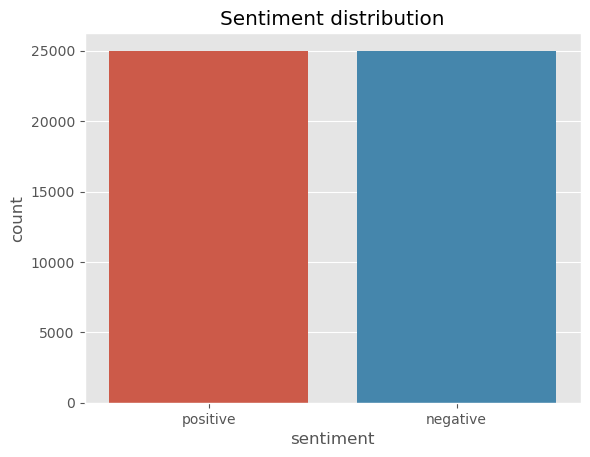

In [5]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

    Les deux barres ont une hauteur très similaire, ce qui suggère que le nombre de sentiments positifs et négatifs est presque égal dans le jeu de données.
    Chaque catégorie de sentiment a environ 25 000 occurrences, indiquant une distribution équilibrée des sentiments dans le jeu de données.    
    La distribution des sentiments dans le jeu de données est assez équilibrée, avec des nombres presque égaux de sentiments positifs et négatifs.

In [6]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

Étapes de traitement NLP
- Nettoyage du texte : Enlever les balises HTML et convertir le texte en minuscules.
- Tokenisation : Diviser le texte en mots.
- Suppression des stopwords : Enlever les mots vides (comme "the", "is", etc.).
- Stemming : Réduire les mots à leur racine.

In [7]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [8]:
df['word count'] = df['review'].apply(no_of_words)

    La fonction no_of_words est une fonction simple mais efficace pour compter le nombre de mots dans une chaîne de caractères. Elle utilise la méthode split() pour diviser la chaîne en mots et len() pour compter le nombre de mots.

In [9]:
df.head()

review sentiment  word count
0  One of the other reviewers has mentioned that ...  positive         307
1  A wonderful little production. <br /><br />The...  positive         162
2  I thought this was a wonderful way to spend ti...  positive         166
3  Basically there's a family where a little boy ...  negative         138
4  Petter Mattei's "Love in the Time of Money" is...  positive         230

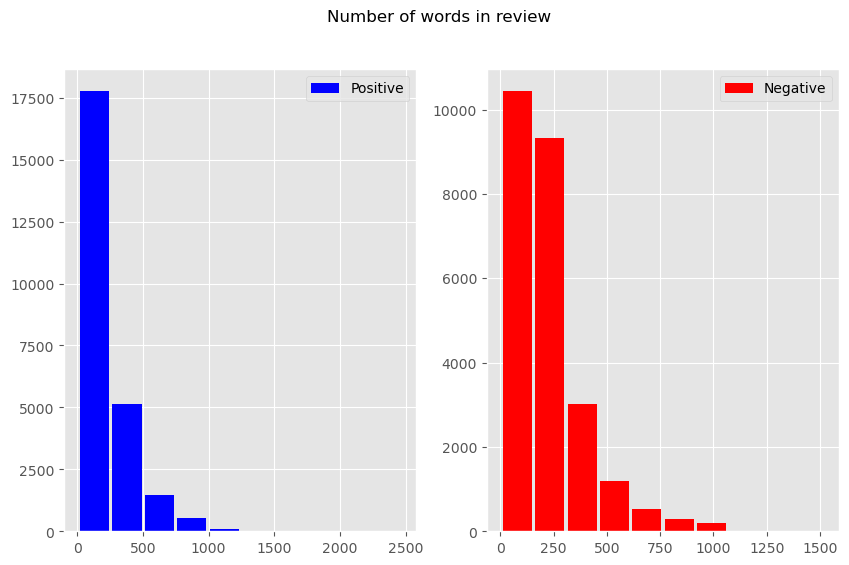

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

### Critiques Positives :
- La majorité des critiques positives contiennent entre 0 et 500  mots.
- Il y a un nombre très élevé de critiques positives avec moins de 500 mots, culminant à environ 17500 critiques.
- Un nombre significatif de critiques positives a entre 500 et 1000 mots, mais cela diminue rapidement.
- Il y a quelques critiques positives qui ont plus de 1000 mots, mais elles sont rares.
### Critiques Négatives :
- De manière similaire aux critiques positives, la majorité des critiques négatives contiennent entre 0 et 500 mots.
- Environ 10000 critiques négatives ont moins de 500 mots, ce qui est significativement moins que les critiques positives dans cette plage de mots.
- Il y a aussi une diminution rapide du nombre de critiques avec l'augmentation du nombre de mots au-delà de 500.
- Les critiques négatives avec plus de 1000 mots sont également rares.

La distribution montre que la plupart des critiques, qu'elles soient positives ou négatives, sont relativement courtes (moins de 500 mots). Cependant, il semble y avoir plus de critiques positives que négatives dans cet ensemble de données, surtout dans la catégorie des critiques très courtes. Les critiques plus longues sont moins fréquentes, ce qui pourrait indiquer que les gens sont plus susceptibles de laisser des critiques brèves, indépendamment de leur sentiment.

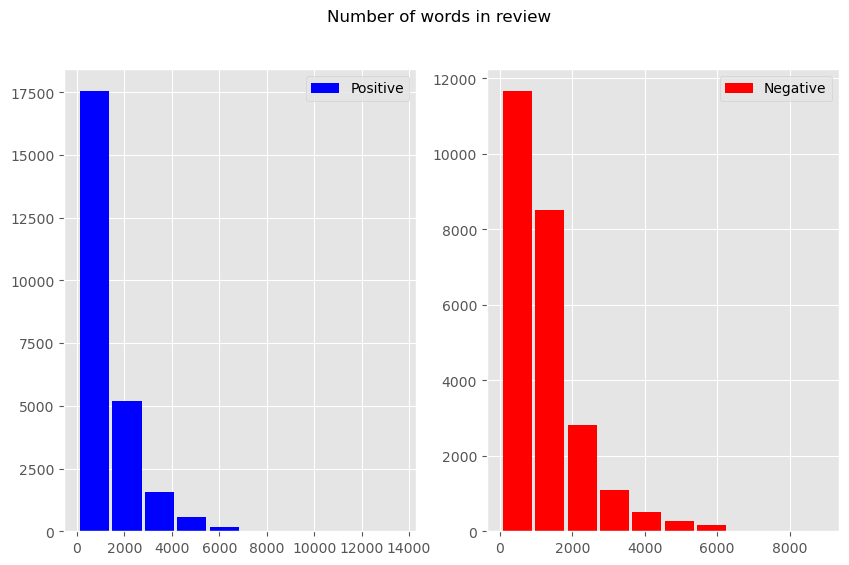

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

    Les critiques positives et négatives sont généralement courtes, mais les critiques négatives ont une légère tendance à être plus longues que les critiques positives. Cette visualisation peut aider à comprendre comment les utilisateurs expriment leurs sentiments en fonction de la longueur de leurs critiques.

In [12]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 2, inplace=True)

In [13]:
df.head()

review  sentiment  word count
0  One of the other reviewers has mentioned that ...          1         307
1  A wonderful little production. <br /><br />The...          1         162
2  I thought this was a wonderful way to spend ti...          1         166
3  Basically there's a family where a little boy ...          2         138
4  Petter Mattei's "Love in the Time of Money" is...          1         230

In [14]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

- convertit tout le texte en minuscules pour assurer que le traitement ultérieur ne soit pas sensible à la casse.
- supprime les balises HTML <br /> du texte.
- utilise une expression régulière pour supprimer toutes les URL présentes dans le texte.
- supprime les mentions (@nom_utilisateur) et les hashtags (#mot) du texte.
- supprime tous les caractères non alphanumériques (comme les ponctuations) du texte, ne laissant que des lettres et des chiffres
- divise le texte en une liste de mots individuels (tokens) en utilisant la fonction word_tokenize de NLTK.
-  filtre les mots vides (comme "et", "ou", "le", "la" en français) de la liste des tokens.
- reconstitue le texte filtré en une seule chaîne de caractères, où les tokens sont joints par des espaces.

In [15]:
df.review = df['review'].apply(data_processing)

In [16]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [17]:
df = df.drop_duplicates('review')

In [18]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

Ce code est de prétraiter le texte en réduisant chaque mot à sa racine, ce qui peut améliorer les performances des modèles de NLP en réduisant la variance causée par les différentes formes d'un mot. Cela permet aux modèles de mieux comprendre les relations entre les mots en se concentrant sur leurs racines communes plutôt que sur leurs variations.

In [19]:
df.review = df['review'].apply(lambda x: stemming(x))

In [20]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
3  basically theres family little boy jake thinks...          2          67
4  petter matteis love time money visually stunni...          1         125

In [21]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mann

In [22]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
4  petter matteis love time money visually stunni...          1         125
5  probably alltime favorite movie story selfless...          1          58

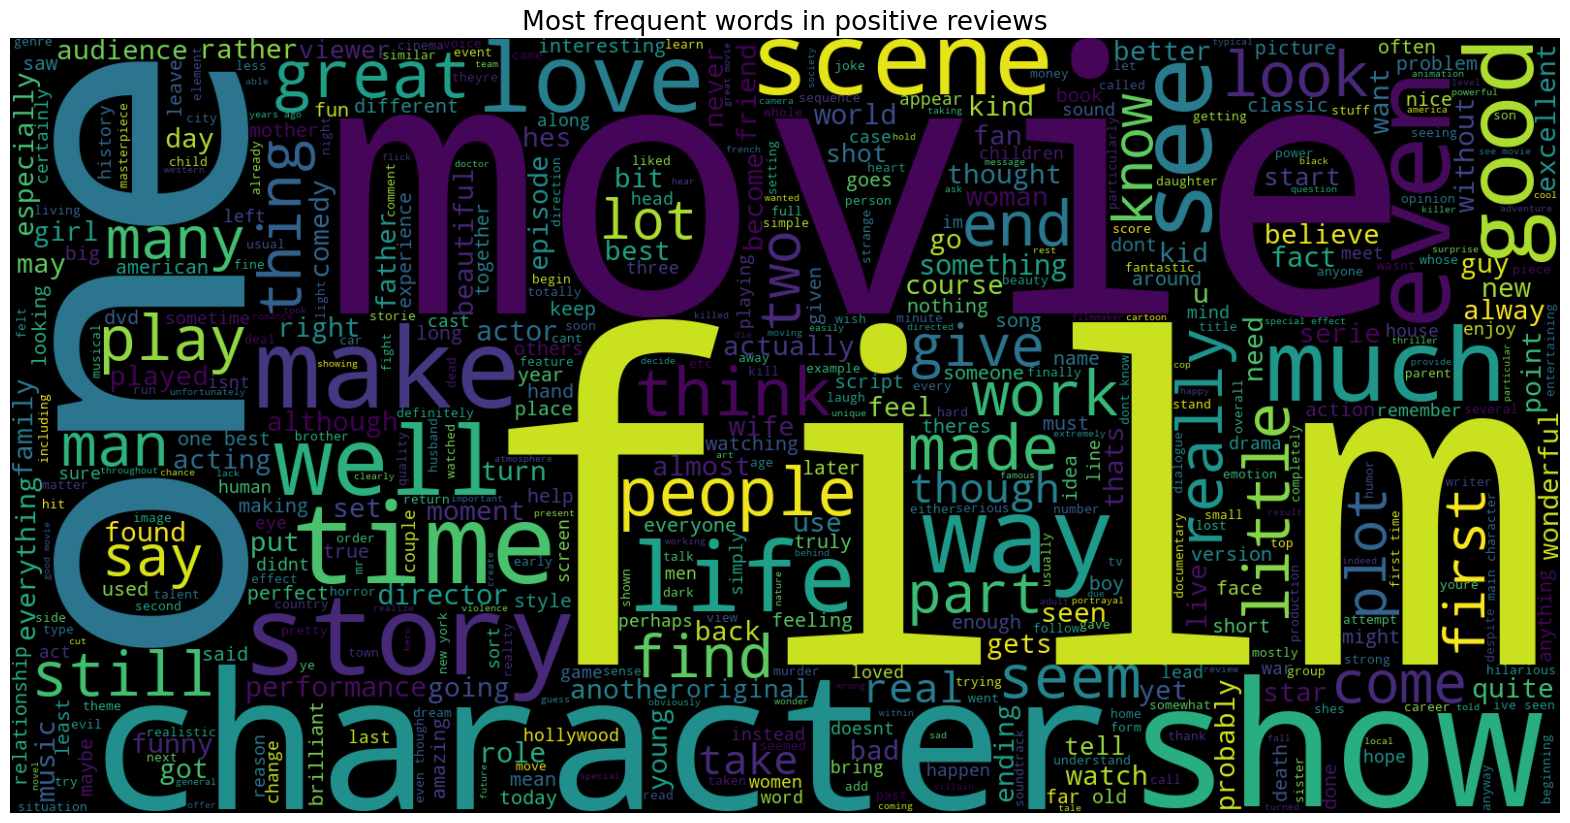

In [23]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [24]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [25]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

word  count
0   film  39285
1  movie  35830
2    one  25621
3   like  16998
4   good  14281

In [26]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')

In [27]:
neg_reviews =  df[df.sentiment == 2]
neg_reviews.head()

review  sentiment  word count
3   basically theres family little boy jake thinks...          2          67
7   show amazing fresh innovative idea 70s first a...          2          83
8   encouraged positive comments film looking forw...          2          64
10  phil alien one quirky films humour based aroun...          2          51
11  saw movie 12 came recall scariest scene big bi...          2          84

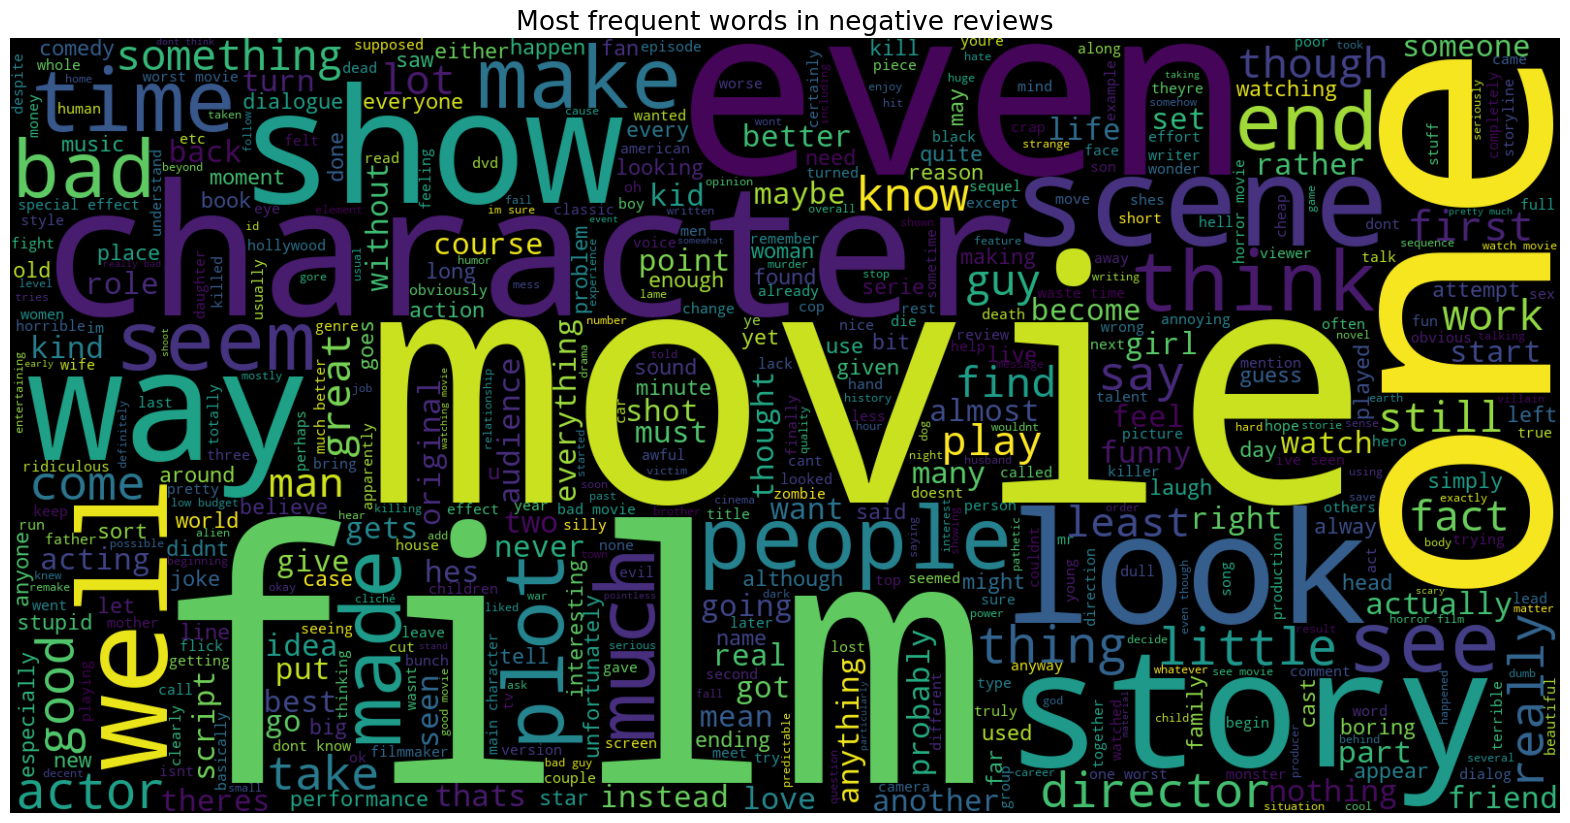

In [28]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [29]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [30]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

word  count
0  movie  47001
1   film  34651
2    one  24361
3   like  21508
4   even  14759

In [31]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

In [32]:
X = df['review']
Y = df['sentiment']

In [33]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

- TfidfVectorizer est une classe de scikit-learn qui convertit une collection de documents bruts en une matrice de fonctionnalités TF-IDF.
- TF-IDF (Term Frequency-Inverse Document Frequency) est une technique de pondération utilisée pour évaluer l'importance d'un mot dans un document par rapport à une collection de documents (corpus).
fit_transform est une méthode qui combine deux étapes: 
    - fit: Apprend le vocabulaire du corpus (c'est-à-dire, les mots uniques et leur fréquence).
    - transform: Transforme les documents en une matrice TF-IDF en utilisant le vocabulaire appris.
    
Après exécution de ce code, la variable X contiendra une matrice creuse de dimensions (nombre de documents, nombre de termes uniques). Chaque élément de cette matrice représente le score TF-IDF d'un mot particulier dans un document particulier.

### Que fait TfidfVectorizer ?
- Term Frequency (TF) : La fréquence d'un terme dans un document. Plus un mot apparaît dans un document, plus sa valeur TF est élevée.
- Inverse Document Frequency (IDF) : Une mesure de l'importance du terme dans l'ensemble du corpus. Un mot commun à de nombreux documents aura une valeur IDF basse.
- TF-IDF : Le produit de TF et IDF, donnant une mesure qui équilibre la fréquence du mot dans un document avec son importance globale dans le corpus. Les mots fréquents dans un document mais rares dans le corpus auront des valeurs TF-IDF élevées.

La transformation TF-IDF est couramment utilisée en traitement du langage naturel (NLP) pour :

- Classification de texte : Les documents transformés en matrices TF-IDF peuvent être utilisés comme entrée pour des algorithmes de classification.
- Clustering : Les matrices TF-IDF peuvent être utilisées pour regrouper des documents similaires.
- Recherche d'information : Les scores TF-IDF peuvent aider à évaluer la pertinence d'un document pour une requête donnée.

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [35]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 221707)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221707)
Size of y_test:  (14874,)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [37]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.06%


In [38]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[6790  723]
 [ 904 6457]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [40]:
import joblib
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
# Sauvegarder le modèle dans un fichier .pkl
joblib.dump(mnb, 'MultinomialNB.pkl')
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))


Test accuracy: 86.44%


In [41]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[6439 1074]
 [ 943 6418]]


              precision    recall  f1-score   support

           1       0.87      0.86      0.86      7513
           2       0.86      0.87      0.86      7361

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [42]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.22%


In [43]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6766  747]
 [ 857 6504]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.872 total time=   0.3s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.3s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.3s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.2s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.5s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.4s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.4s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.3s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.3s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.4s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.896 total time=   0.8s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [45]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.89
best parameters:  {'C': 1, 'loss': 'hinge'}


In [46]:
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.41%


In [47]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6788  725]
 [ 850 6511]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.90      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874

